**IMPORTS**

In [59]:
import pandas as pd
import os
import json
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import datetime
import matplotlib.dates as mdates
import seaborn as sns
import networkx as nx

# **METHODS**

### **Helper Methods**

In [60]:
def correct_and_format_json(file_path):
    """ Fromats the JSON file by replacing single quotes with double quotes
    and by removing all trailing commas (to avoid having multiple JSON Objects per line)
    Lastly, the re-formatted json is saved by overwriting the original JSON file"""

    try:
        # Read the whole file content
        with open(file_path, 'r') as file:
            # Split lines and strip any potential whitespace
            lines = [line.strip() for line in file if line.strip()]

        # Replace single quotes with double quotes and remove potential trailing commas
        corrected_lines = [line.replace("'", '"').rstrip(',') for line in lines]

        # Combine all lines into a single JSON array string
        combined_json = '[' + ','.join(corrected_lines) + ']'

        # Parse it back to a Python object to ensure it's valid JSON
        json_data = json.loads(combined_json)

        # Write the corrected JSON back to the file
        with open(file_path, 'w') as file:
            json.dump(json_data, file, indent=4)

        print("JSON file corrected and formatted successfully.")

    except Exception as e:
        print("An error occurred:", e)


In [61]:
def is_json_formatted_correctly(file_path):
    """ Check if the JSON file is properly formatted. """
    try:
        with open(file_path, 'r') as file:
            json.load(file)  # Try loading the file with the json module
        return True
    except json.JSONDecodeError:
        return False

In [62]:
def get_df_from_json(file_path):
  """Creates a dataframe from JSON file. If unable to read the JSON file, it attempots to format it"""

  if not os.path.exists(file_path):
    print("File does not exists")
    exit()

  if not is_json_formatted_correctly(file_path):
        correct_and_format_json(file_path)
  try:
      df = pd.read_json(file_path)
      print("DataFrame created successfully.")
      #print(df.head(10))  # Display the first 10 rows
      return df

  except ValueError as e:
      print("Error:", e)




In [63]:
def clean_and_extract_categories(categories_list):
    """ Extract list of categories from dataframe column 'categories' """
    try:
        flattened_list = [item for sublist in categories_list for item in sublist]
        return flattened_list
    except Exception as e:
        print(f"Error processing {categories_list}: {e}")
        return []

# **MAIN**

### **Data Loading**

*The JSON file provided is not formatted correctly. More specifically, it uses single quotes('') instead of double("") and there seems to be multiple JSON Objects per line. We reformat it and create a dataframe from it. After that, we convert also the csv fie into a dataframe with specified column names, since the original csv file had none. Lastly, we merge together the two dataframe on the attribute 'asin'*

In [64]:
formatted_json_df = get_df_from_json('/data/meta_Amazon_Instant_Video.json')

csv_df = pd.read_csv('/data/ratings.csv',
                     names=['user_id', 'asin', 'rating', 'timestamp'])  # these are supposed !!!

# You can use how='inner' to keep only rows that match in both dataframes
# or how='outer' to keep all rows from both dataframes, filling in NaN where there are no matches
df = pd.merge(formatted_json_df, csv_df, on='asin', how='inner')
df

DataFrame created successfully.


,asin,categories,price,related,user_id,rating,timestamp
0,B000GFDAUG,[[Amazon Instant Video]],NaN,NaN,A1EE2E3N7PW666,5.0,1202256000
1,B000GFDAUG,[[Amazon Instant Video]],NaN,NaN,AGZ8SM1BGK3CK,5.0,1198195200
2,B000GIOPK2,[[Amazon Instant Video]],NaN,NaN,A2VHZ21245KBT7,4.0,1215388800
3,B000GIOPK2,[[Amazon Instant Video]],NaN,NaN,ACX8YW2D5EGP6,4.0,1185840000
4,B000GIOPK2,[[Amazon Instant Video]],NaN,NaN,A9RNMO9MUSMTJ,2.0,1281052800
...,...,...,...,...,...,...,...
583928,B00LSWNB9Q,[[Amazon Instant Video]],NaN,NaN,AOK8AARD069GP,1.0,1405987200
583929,B00LSWNB9Q,[[Amazon Instant Video]],NaN,NaN,A1IWX2XBFTCMSR,5.0,1405641600
583930,B00LU8ONBI,[[Amazon Instant Video]],NaN,NaN,AEO407GROR6JB,1.0,1405468800
583931,B00LU8ONBI,[[Amazon Instant Video]],NaN,NaN,A2YXWWVABHWIXN,5.0,1405728000


Since the timestamps are not human readable, I add a column containing its 'human readable' equivalent

In [65]:
df['timestamp'] = df['timestamp'].astype(int)
df['readable_date'] = pd.to_datetime(df['timestamp'], unit='s')
df

,asin,categories,price,related,user_id,rating,timestamp,readable_date
0,B000GFDAUG,[[Amazon Instant Video]],NaN,NaN,A1EE2E3N7PW666,5.0,1202256000,2008-02-06
1,B000GFDAUG,[[Amazon Instant Video]],NaN,NaN,AGZ8SM1BGK3CK,5.0,1198195200,2007-12-21
2,B000GIOPK2,[[Amazon Instant Video]],NaN,NaN,A2VHZ21245KBT7,4.0,1215388800,2008-07-07
3,B000GIOPK2,[[Amazon Instant Video]],NaN,NaN,ACX8YW2D5EGP6,4.0,1185840000,2007-07-31
4,B000GIOPK2,[[Amazon Instant Video]],NaN,NaN,A9RNMO9MUSMTJ,2.0,1281052800,2010-08-06
...,...,...,...,...,...,...,...,...
583928,B00LSWNB9Q,[[Amazon Instant Video]],NaN,NaN,AOK8AARD069GP,1.0,1405987200,2014-07-22
583929,B00LSWNB9Q,[[Amazon Instant Video]],NaN,NaN,A1IWX2XBFTCMSR,5.0,1405641600,2014-07-18
583930,B00LU8ONBI,[[Amazon Instant Video]],NaN,NaN,AEO407GROR6JB,1.0,1405468800,2014-07-16
583931,B00LU8ONBI,[[Amazon Instant Video]],NaN,NaN,A2YXWWVABHWIXN,5.0,1405728000,2014-07-19


### **Data Visualization**

**Histograms**

We can see from the rating distribution below:
* It is going to be skewed towards the higher ratings as there is less data for the lower ratings
* The ratings are categorical which might help us train the neural net.


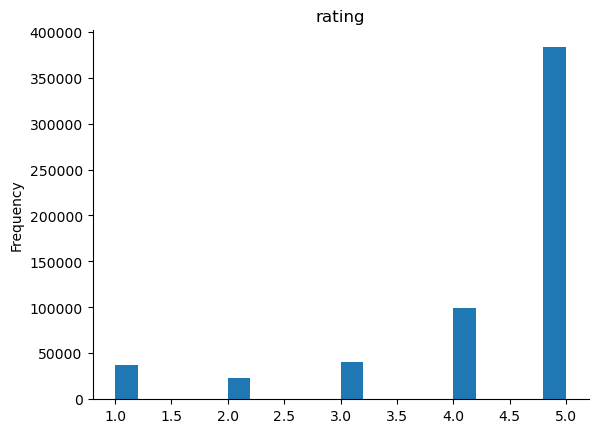

In [66]:
#ratings distribution
df['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

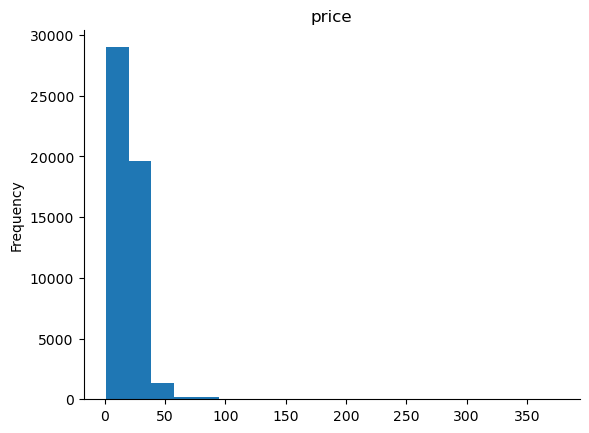

In [67]:
#price distribution
df['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

**ScatterPlots**

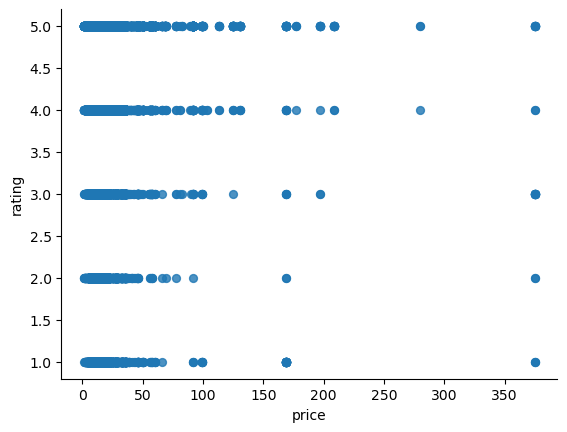

In [68]:
#scatter plot price-rating
df.plot(kind='scatter', x='price', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

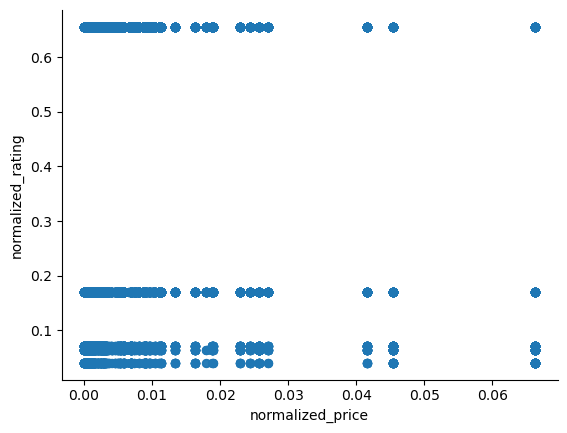

In [69]:
# scatter price-rating normalized by their frequency
df_copy = df.copy()
price_counts = df_copy['price'].value_counts(normalize=True)
rating_counts = df_copy['rating'].value_counts(normalize=True)

df_copy['normalized_price'] = df_copy['price'].map(price_counts)
df_copy['normalized_rating'] = df_copy['rating'].map(rating_counts)

df_copy.plot(kind='scatter', x='normalized_price', y='normalized_rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

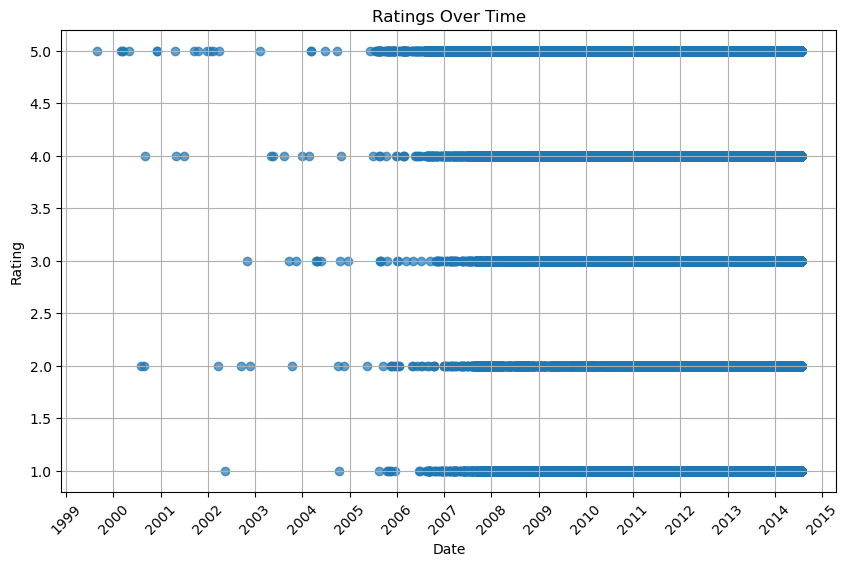

In [70]:
# scatter time-ratings

plt.figure(figsize=(10, 6))
plt.scatter(df['readable_date'], df['rating'], alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Rating')
plt.title('Ratings Over Time')
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


plt.xticks(rotation=45)

plt.show()

**Piecharts**

We can see from the price distribution below that there are a lot of NaN values, We will use an imputer to take the mean value as that should represent reality.

price
None     533362
price     50571
Name: count, dtype: int64


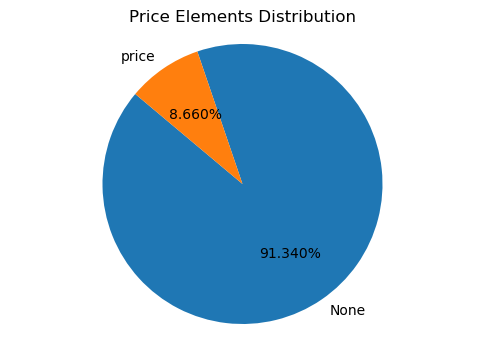

In [71]:
#piechart of price - we preprocess price labels to be either None or 'price'
df_copy = df.copy()


df_copy['price'] = df_copy['price'].apply(lambda x: 'None' if pd.isna(x) else 'price')

priced_counts = df_copy['price'].value_counts()
print(priced_counts)


plt.figure(figsize=(6, 4))
plt.pie(priced_counts, labels=priced_counts.index, autopct='%1.3f%%', startangle=140) #high precisin labels
plt.title('Price Elements Distribution')
plt.axis('equal')
plt.show()

related
None    583796
item       137
Name: count, dtype: int64


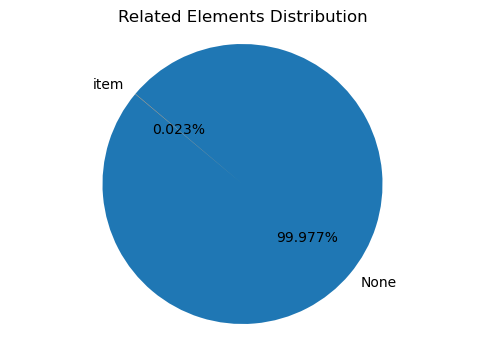

In [72]:
#piechart of related - we preprocess related labels to be either None or 'item'
df_copy = df.copy()

df_copy['related'] = df_copy['related'].apply(lambda x: 'None' if pd.isna(x) else 'item')

related_counts = df_copy['related'].value_counts()
print(related_counts)

plt.figure(figsize=(6, 4))
plt.pie(related_counts, labels=related_counts.index, autopct='%1.3f%%', startangle=140)
plt.title('Related Elements Distribution')
plt.axis('equal')
plt.show()

Here we are looking at the category distribution, since every entry's category is the same, we will discard this as a feature

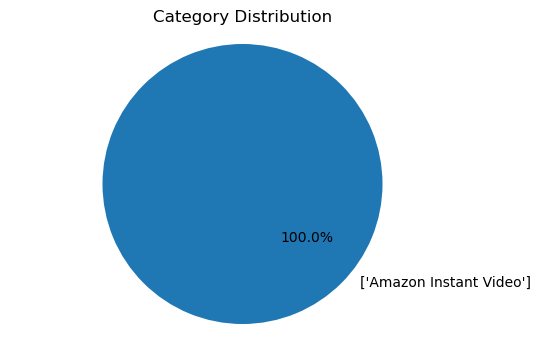

In [73]:
#category piechart
category_counts = df['categories'].apply(clean_and_extract_categories).value_counts()

plt.figure(figsize=(6, 4))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Category Distribution')
plt.axis('equal')
plt.show()

**Correlation Plot**

Given That the category is one, we exclude that from the correlation plot.

              price  timestamp    rating  user_id_
price      1.000000   0.013076  0.002447  0.006650
timestamp  0.013076   1.000000  0.026589  0.001933
rating     0.002447   0.026589  1.000000  0.003027
user_id_   0.006650   0.001933  0.003027  1.000000


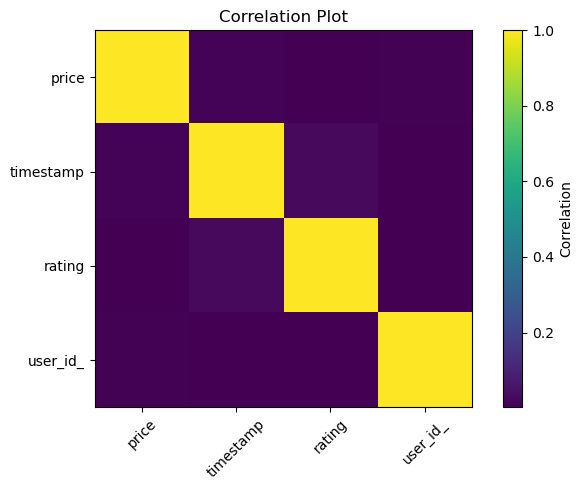

In [74]:
#correlation plot
label_encoder = LabelEncoder()
dfc = df.copy()
dfc['user_id_'] = label_encoder.fit_transform(dfc['user_id'])
df_correlation = dfc[["price","timestamp","rating","user_id_"]].corr()
print(df_correlation)

# Plot------------------------------------------------------------
plt.style.use('default')
plt.figure(figsize=(7, 5))
plt.imshow(df_correlation, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Plot')
plt.xticks(range(len(df_correlation)), df_correlation.columns, rotation=45)
plt.yticks(range(len(df_correlation)), df_correlation.columns)
plt.tight_layout()
plt.show()

**Related Visualization**

We need some data preproceesing to correctly handle the related items:

In [75]:
# Make a copy of the dataframe
df_copy = df.copy()

# Extract item list from also_viewed dictionary
df_copy['related'] = df_copy['related'].apply(lambda x: x.get('also_viewed') if isinstance(x, dict) else [])

# Create a list containing only unique product IDs
unique_ids = list(set(df_copy['asin']).union(*df_copy['related']))

# remove from dataframe entries with no related list
df_with_related = df_copy[df_copy['related'].apply(lambda x: len(x) > 0)]

Create the Graph

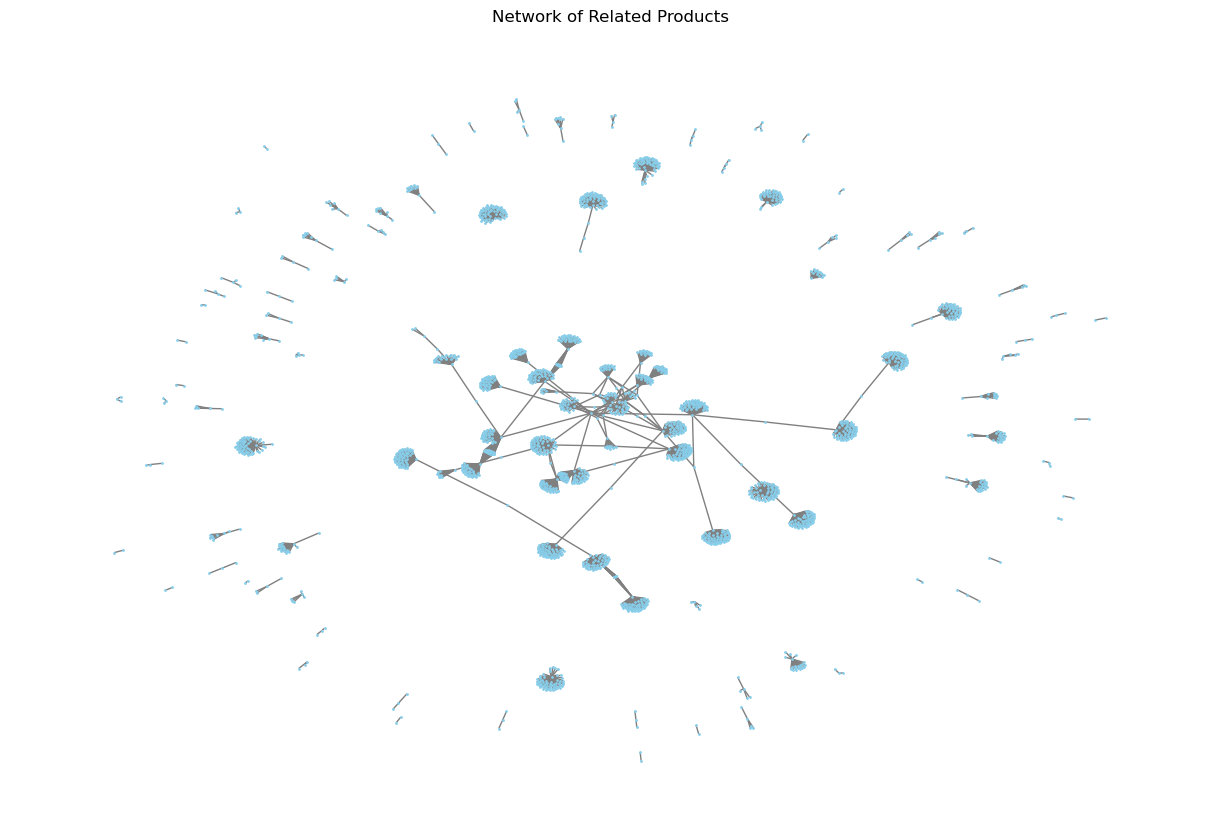

In [76]:
if df_with_related.empty:
    print("No products with related information found.")
else:
    G = nx.Graph()

    # Add nodes (asin) and edges (asins in the rekated list) to the graph
    for idx, row in df_with_related.iterrows():
        product = row['asin']
        related_products = row['related']
        if isinstance(related_products, list):
            for related in related_products:
                G.add_edge(product, related)

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42, iterations=50)
    nx.draw(G, pos, with_labels=False, node_size=1, node_color="skyblue", edge_color='gray')
    plt.title('Network of Related Products')
    plt.show()

Create correlation matrix

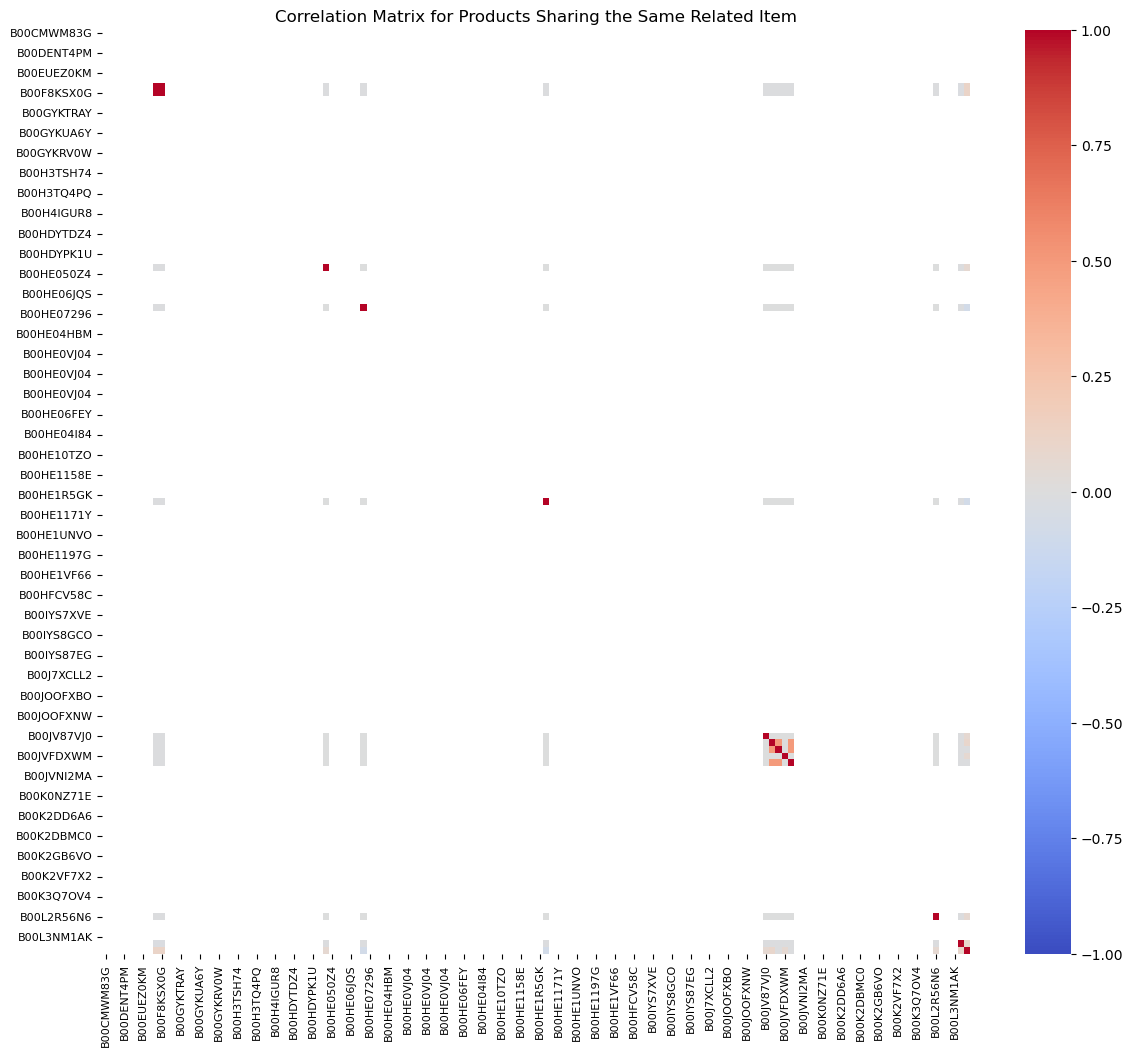

In [77]:
# asymmetric matrix for related products (it contains only products which appear in the related lists)
# matrix is ASINs x ASINs filled with 1 if ASIN contains ASIN in its related
related_matrix = pd.DataFrame(0, index=unique_ids, columns=unique_ids)
for idx, row in df_with_related.iterrows():
    product = row['asin']
    related_products = row['related']
    for related in related_products:
        related_matrix.loc[product, related] = 1

# Add ratings to the binary matrix
rating_series = df_with_related.set_index('asin')['rating']
related_matrix = related_matrix.loc[rating_series.index, rating_series.index]
related_matrix = related_matrix.join(rating_series)

# Calculate the correlation matrix
correlation_matrix = related_matrix.corr()

# Plotting the correlation matrix + heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Products Sharing the Same Related Item')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

###Recommender System 1###

In [ ]:
!pip install -q scikit-surprise

In [78]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split as surprise_train_test_split
from sklearn.metrics import mean_squared_error

We are going to handle the related column by just seeing how many items were seen given a item. Since they are low in numbers (The count of the related columns as seen from the distribution above), we can infer that this column should not have a major impact on the ratings.

In [79]:
def handle_related_column(value):
    if isinstance(value, str):
        try:
            related_dict = eval(value)
            if 'also_viewed' in related_dict:
                return len(related_dict['also_viewed'])
        except (SyntaxError, NameError):
            return 0
    return 0

In [80]:
# Drop the 'category' column since it has only one unique value
df = df.drop(columns=['categories'])

# Handle missing values in 'price' by filling them with the mean of the price column.
imputer = SimpleImputer(strategy='mean')
df['price'] = imputer.fit_transform(df[['price']])

# Handle the 'related' column
# For simplicity, we will extract the 'also_viewed' attribute and count the number of also viewed products
df['related'] = df['related'].apply(handle_related_column)

# Check the dataframe after preprocessing
print(df.head())

         asin     price  related         user_id  rating   timestamp  \
0  B000GFDAUG  19.64239        0  A1EE2E3N7PW666     5.0  1202256000   
1  B000GFDAUG  19.64239        0   AGZ8SM1BGK3CK     5.0  1198195200   
2  B000GIOPK2  19.64239        0  A2VHZ21245KBT7     4.0  1215388800   
3  B000GIOPK2  19.64239        0   ACX8YW2D5EGP6     4.0  1185840000   
4  B000GIOPK2  19.64239        0   A9RNMO9MUSMTJ     2.0  1281052800   

  readable_date  
0    2008-02-06  
1    2007-12-21  
2    2008-07-07  
3    2007-07-31  
4    2010-08-06  


In [81]:
# Split the dataframe into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Remove the 'rating' column from the test set
test_df_without_rating = test_df.drop(columns=['rating'])

# Save the actual ratings of the test set to compare later
test_df_ratings = test_df['rating']

print("Train set size:", train_df.shape)
print("Test set size:", test_df_without_rating.shape)

Train set size: (467146, 7)
Test set size: (116787, 6)


In [82]:
# Create the Reader object
reader = Reader(rating_scale=(df['rating'].min(), df['rating'].max()))

# Create the dataset for Surprise
data = Dataset.load_from_df(
    train_df[['user_id', 'asin', 'rating']], reader)

# Split into train and test set for Surprise
trainset, testset = surprise_train_test_split(data, test_size=0.2)

# Instantiate the SVD algorithm
svd = SVD()

# Train the algorithm on the trainset
svd.fit(trainset)

In [83]:

# Prepare the test set without ratings for predictions
testset_for_predictions = [(row['user_id'], row['asin'], 0)
                           for _, row in test_df_without_rating.iterrows()]

# Predict the ratings
predictions = svd.test(testset_for_predictions)

# Extract the predicted ratings
predicted_ratings = [pred.est for pred in predictions]
predicted_df = test_df_without_rating.copy()
predicted_df['predicted_rating'] = predicted_ratings


# Merge with the actual ratings
comparison_df = predicted_df.copy()
comparison_df['actual_rating'] = test_df_ratings.values

# Print the dataframe with original columns, predicted ratings, and actual ratings
print(comparison_df.head())

# Calculate RMSE
actual_ratings = comparison_df['actual_rating']
predicted_ratings = comparison_df['predicted_rating']
rmse_value = mean_squared_error(
    actual_ratings, predicted_ratings, squared=False)
print(f'RMSE: {rmse_value}')

              asin     price  related         user_id   timestamp  \
521213  B00I3MPDP4  19.64239        0  A2VZVLZZ21C4X3  1392163200   
45709   B001F6ZIXC  19.64239        0   AIG9VQWWRMPA5  1306281600   
480425  B00F49E8O6  19.64239        0  A1QTIS18YKAH48  1394496000   
55281   B001SRN6IW  19.64239        0  A1KZ2YOYI069QA  1372118400   
147281  B004POVQ4Q  19.64239        0   AAT9J4L6FBLN7  1353888000   

       readable_date  predicted_rating  actual_rating  
521213    2014-02-12          4.717516            5.0  
45709     2011-05-25          4.722257            5.0  
480425    2014-03-11          4.610599            3.0  
55281     2013-06-25          3.935987            5.0  
147281    2012-11-26          4.316433            1.0  
RMSE: 1.0499042268817602


In [84]:
comparison_df

,asin,price,related,user_id,timestamp,readable_date,predicted_rating,actual_rating
521213,B00I3MPDP4,19.64239,0,A2VZVLZZ21C4X3,1392163200,2014-02-12,4.717516,5.0
45709,B001F6ZIXC,19.64239,0,AIG9VQWWRMPA5,1306281600,2011-05-25,4.722257,5.0
480425,B00F49E8O6,19.64239,0,A1QTIS18YKAH48,1394496000,2014-03-11,4.610599,3.0
55281,B001SRN6IW,19.64239,0,A1KZ2YOYI069QA,1372118400,2013-06-25,3.935987,5.0
147281,B004POVQ4Q,19.64239,0,AAT9J4L6FBLN7,1353888000,2012-11-26,4.316433,1.0
...,...,...,...,...,...,...,...,...
51360,B001NJTMZQ,19.64239,0,A2A9LLD4U40XGD,1389830400,2014-01-16,4.677874,5.0
105967,B003OURWUO,19.64239,0,A9AG2K0CQOQHG,1383091200,2013-10-30,4.616648,5.0
169344,B0058BIL3O,19.64239,0,AIW53D3W4EHAK,1363737600,2013-03-20,4.709450,5.0
178756,B005JWGFR6,16.29000,0,A3CI0GYXLMR3KV,1382659200,2013-10-25,4.382807,5.0


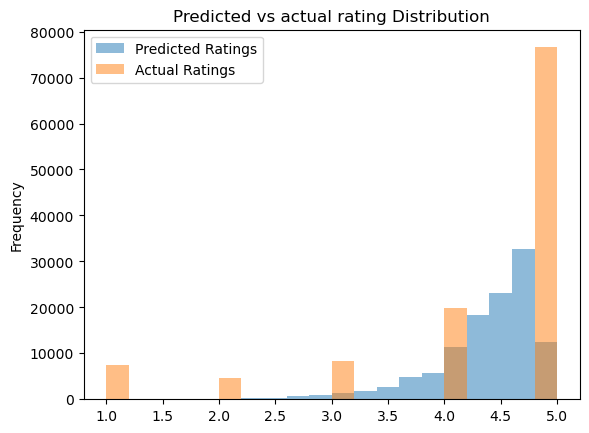

In [85]:
# ratings distribution
comparison_df['predicted_rating'].plot(
    kind='hist', bins=20, alpha=0.5, label="Predicted Ratings")
comparison_df['actual_rating'].plot(
    kind='hist', bins=20, alpha=0.5, label="Actual Ratings")
plt.title("Predicted vs actual rating Distribution")
plt.legend(loc='upper left')

Looking at the comparison above, we can say that the model is likely to predict higher values, which is what we expected. However, we also see that the model is very unlikely to predict values which are lower. Thus, we can say that even though the RMSE value is good, it does not encapsulate the full picture, as it is a value centered around the mean.

###Recommender System 2###

In [86]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_squared_error

# Rounding the ratings to an int
df['rating'] = df['rating'].round().astype(int)
df = df[df['rating'].between(1, 5)]

df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Create time-based features
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Sort data by timestamp to respect temporal order
df = df.sort_values(by='timestamp')

# Check the dataframe after preprocessing
print(df.head())

             asin     price  related         user_id  rating  timestamp  \
27999  B000W453KQ  19.64239        0  A2F8R40Z2OMIJM       5 1999-08-24   
82946  B0032DGB5K  19.64239        0  A282IMYVM6GP1L       5 2000-03-01   
82947  B0032DGB5K  19.64239        0  A3RQ1HL5PWTV33       5 2000-03-04   
5778   B000ID1PUI  19.64239        0  A2W9J1ZCL5N1ZB       5 2000-03-14   
28007  B000W453KQ  19.64239        0  A136YD08SCJ2LV       5 2000-04-27   

      readable_date  year  month  day  day_of_week  
27999    1999-08-24  1999      8   24            1  
82946    2000-03-01  2000      3    1            2  
82947    2000-03-04  2000      3    4            5  
5778     2000-03-14  2000      3   14            1  
28007    2000-04-27  2000      4   27            3  


We have now extracted 4 features from the timestamp, we will not need to feed the raw timestamp values to the FFNN

In [87]:
# Encode alphanumeric user_id and product_id to integers
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

df['user_id'] = user_encoder.fit_transform(df['user_id'])
df['asin'] = item_encoder.fit_transform(df['asin'])

# Check the dataframe after encoding
print(df.head())


       asin     price  related  user_id  rating  timestamp readable_date  \
27999   957  19.64239        0   161111       5 1999-08-24    1999-08-24   
82946  5273  19.64239        0   138503       5 2000-03-01    2000-03-01   
82947  5273  19.64239        0   312705       5 2000-03-04    2000-03-04   
5778    178  19.64239        0   214459       5 2000-03-14    2000-03-14   
28007   957  19.64239        0    10689       5 2000-04-27    2000-04-27   

       year  month  day  day_of_week  
27999  1999      8   24            1  
82946  2000      3    1            2  
82947  2000      3    4            5  
5778   2000      3   14            1  
28007  2000      4   27            3  


In [88]:
class RatingsDataset(Dataset):
    def __init__(self, df):
        self.user_ids = torch.tensor(df['user_id'].values, dtype=torch.long)
        self.item_ids = torch.tensor(df['asin'].values, dtype=torch.long)
        self.ratings = torch.tensor(df['rating'].values - 1, dtype=torch.long)        # Cross-Entropy needs a 0 indexed rating
        self.year = torch.tensor(df['year'].values, dtype=torch.float32)
        self.month = torch.tensor(df['month'].values, dtype=torch.float32)
        self.day = torch.tensor(df['day'].values, dtype=torch.float32)
        self.day_of_week = torch.tensor(
            df['day_of_week'].values, dtype=torch.float32)
        self.price = torch.tensor(df['price'].values, dtype=torch.float32)
        self.related = torch.tensor(df['related'].values, dtype=torch.float32)

    def __len__(self):
        return len(self.ratings)

    def __getitem__(self, idx):
        return {
            'user_id': self.user_ids[idx],
            'asin': self.item_ids[idx],
            'rating': self.ratings[idx],
            'year': self.year[idx],
            'month': self.month[idx],
            'day': self.day[idx],
            'day_of_week': self.day_of_week[idx],
            'price': self.price[idx],
            'related': self.related[idx]
        }

In [89]:
# Split the dataframe into train and test sets based on time
split_date = df['timestamp'].quantile(0.8)  # 80-20 split based on time
train_df = df[df['timestamp'] <= split_date]
test_df = df[df['timestamp'] > split_date]

# Create datasets and dataloaders
train_dataset = RatingsDataset(train_df)
test_dataset = RatingsDataset(test_df)

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

In [90]:
class RecommenderNet(nn.Module):
    def __init__(self, num_users, num_items, embedding_size):
        super(RecommenderNet, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_size)
        self.item_embedding = nn.Embedding(num_items, embedding_size)
        self.fc1 = nn.Linear(embedding_size * 2 + 6, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 5)  # 5 output classes

    def forward(self, user_id, item_id, year, month, day, day_of_week, price, related):
        user_embedded = self.user_embedding(user_id)
        item_embedded = self.item_embedding(item_id)
        features = torch.cat([user_embedded, item_embedded, year.unsqueeze(1), month.unsqueeze(
            1), day.unsqueeze(1), day_of_week.unsqueeze(1), price.unsqueeze(1), related.unsqueeze(1)], dim=1)
        x = torch.relu(self.fc1(features))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Get the number of unique users and items
num_users = df['user_id'].nunique()
num_items = df['asin'].nunique()

# Instantiate the model
model = RecommenderNet(num_users, num_items, embedding_size=100)

In [91]:
# Set device to GPU if available. Using mps by default, uncomment cuda if your machine uses cuda.
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')
# Move model to the device
model.to(device)

Using device: mps


RecommenderNet(
  (user_embedding): Embedding(426922, 100)
  (item_embedding): Embedding(23965, 100)
  (fc1): Linear(in_features=206, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=5, bias=True)
)

In [92]:
# Training parameters
learning_rate = 0.001
epochs = 20

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch in train_loader:
        user_id = batch['user_id'].to(device)
        item_id = batch['asin'].to(device)
        rating = batch['rating'].to(device)
        year = batch['year'].to(device)
        month = batch['month'].to(device)
        day = batch['day'].to(device)
        day_of_week = batch['day_of_week'].to(device)
        price = batch['price'].to(device)
        related = batch['related'].to(device)

        optimizer.zero_grad()
        outputs = model(user_id, item_id, year, month, day,
                        day_of_week, price, related).squeeze()
        loss = criterion(outputs, rating)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * user_id.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}')

Epoch 1/20, Loss: 1.1250
Epoch 2/20, Loss: 1.0060
Epoch 3/20, Loss: 0.9391
Epoch 4/20, Loss: 0.8571
Epoch 5/20, Loss: 0.7688
Epoch 6/20, Loss: 0.6806
Epoch 7/20, Loss: 0.5922
Epoch 8/20, Loss: 0.5171
Epoch 9/20, Loss: 0.4535
Epoch 10/20, Loss: 0.3938
Epoch 11/20, Loss: 0.3458
Epoch 12/20, Loss: 0.3049
Epoch 13/20, Loss: 0.2693
Epoch 14/20, Loss: 0.2460
Epoch 15/20, Loss: 0.2284
Epoch 16/20, Loss: 0.2142
Epoch 17/20, Loss: 0.2013
Epoch 18/20, Loss: 0.1858
Epoch 19/20, Loss: 0.1758
Epoch 20/20, Loss: 0.1683


In [93]:
# Evaluate the model
model.eval()
predicted_ratings = []
actual_ratings = []

with torch.no_grad():
    for batch in test_loader:
        user_id = batch['user_id'].to(device)
        item_id = batch['asin'].to(device)
        rating = batch['rating'].to(device)
        year = batch['year'].to(device)
        month = batch['month'].to(device)
        day = batch['day'].to(device)
        day_of_week = batch['day_of_week'].to(device)
        price = batch['price'].to(device)
        related = batch['related'].to(device)

        outputs = model(user_id, item_id, year, month, day,
                        day_of_week, price, related).squeeze()
        _, predicted = torch.max(outputs, 1)
        predicted_ratings.extend(predicted.cpu().tolist())
        actual_ratings.extend(rating.cpu().tolist())

We will now increase the ratings by 1 so that they are 1-indexed and compare the values.

In [94]:
predicted_ratings = [rat + 1 for rat in predicted_ratings]
actual_ratings = [rat + 1 for rat in actual_ratings]
# Calculate RMSE
rmse_value = mean_squared_error(
    actual_ratings, predicted_ratings, squared=False)
print(f'RMSE: {rmse_value}')

# Create a dataframe with predictions and actual ratings
test_df_without_rating = test_df.drop(columns=['rating'])
predicted_df = test_df_without_rating.copy()
predicted_df['predicted_rating'] = predicted_ratings
comparison_df = predicted_df.copy()
comparison_df['actual_rating'] = actual_ratings

# Print the dataframe with original columns, predicted ratings, and actual ratings
print(comparison_df.head())

RMSE: 1.5500835463827067
         asin     price  related  user_id  timestamp readable_date  year  \
374625  17755  19.64239        0   241293 2014-04-04    2014-04-04  2014   
366361  17487  21.75000        0   408257 2014-04-04    2014-04-04  2014   
161297   9862  19.64239        0    86787 2014-04-04    2014-04-04  2014   
494413  20524  19.64239        0   416023 2014-04-04    2014-04-04  2014   
424903  18577  19.64239        0   251243 2014-04-04    2014-04-04  2014   

        month  day  day_of_week  predicted_rating  actual_rating  
374625      4    4            4                 5              5  
366361      4    4            4                 5              5  
161297      4    4            4                 3              5  
494413      4    4            4                 5              5  
424903      4    4            4                 3              5  


In [95]:
comparison_df

,asin,price,related,user_id,timestamp,readable_date,year,month,day,day_of_week,predicted_rating,actual_rating
374625,17755,19.64239,0,241293,2014-04-04,2014-04-04,2014,4,4,4,5,5
366361,17487,21.75000,0,408257,2014-04-04,2014-04-04,2014,4,4,4,5,5
161297,9862,19.64239,0,86787,2014-04-04,2014-04-04,2014,4,4,4,3,5
494413,20524,19.64239,0,416023,2014-04-04,2014-04-04,2014,4,4,4,5,5
424903,18577,19.64239,0,251243,2014-04-04,2014-04-04,2014,4,4,4,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
576036,23394,19.64239,0,286562,2014-07-23,2014-07-23,2014,7,23,2,5,5
583113,23934,19.64239,0,258531,2014-07-23,2014-07-23,2014,7,23,2,5,4
533145,22229,19.64239,0,277033,2014-07-23,2014-07-23,2014,7,23,2,1,4
583101,23934,19.64239,0,287688,2014-07-23,2014-07-23,2014,7,23,2,4,4


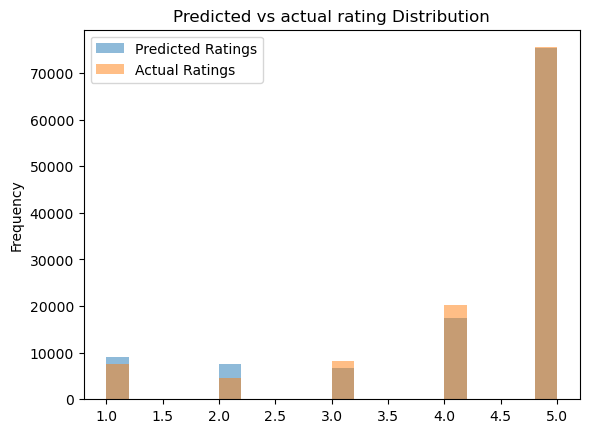

In [96]:
# ratings distribution
comparison_df['predicted_rating'].plot(kind='hist', bins=20, alpha=0.5, label="Predicted Ratings")
comparison_df['actual_rating'].plot(
    kind='hist', bins=20, alpha=0.5, label="Actual Ratings")
plt.title("Predicted vs actual rating Distribution")
plt.legend(loc='upper left')

We can see from the above plot that our predictions more or less captures what the distribution of the true ratings is. We can clearly see that it is more skewed towards the values that are more in number, that is, skewed towards higher ratings. However, this model also predics lower values, which is a step forward from our initial model. Thus, even with a higher RMSE value, we can say that this model is better.